# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | antofagasta
Processing Record 2 of Set 1 | hassi messaoud
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | fale old settlement
Processing Record 6 of Set 1 | chinampa de gorostiza
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | axim
Processing Record 12 of Set 1 | young
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | fort irwin
Processing Record 19 of Set 1 | harstad
Processing Record 20 of Set 1 | susuman
Processing Record 21 of Set 1 | mugia
Processing Record 22 of Set 1 | taiohae

In [58]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [59]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,antofagasta,-23.6500,-70.4000,16.60,85,32,3.10,CL,1684711142
1,hassi messaoud,31.6804,6.0729,21.92,28,0,3.09,DZ,1684711319
2,port-aux-francais,-49.3500,70.2167,6.70,90,93,12.91,TF,1684711255
3,san patricio,28.0170,-97.5169,27.97,66,45,5.18,US,1684711320
4,fale old settlement,-9.3852,-171.2468,28.55,78,98,4.25,TK,1684711320


In [60]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [61]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,antofagasta,-23.6500,-70.4000,16.60,85,32,3.10,CL,1684711142
1,hassi messaoud,31.6804,6.0729,21.92,28,0,3.09,DZ,1684711319
2,port-aux-francais,-49.3500,70.2167,6.70,90,93,12.91,TF,1684711255
3,san patricio,28.0170,-97.5169,27.97,66,45,5.18,US,1684711320
4,fale old settlement,-9.3852,-171.2468,28.55,78,98,4.25,TK,1684711320


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

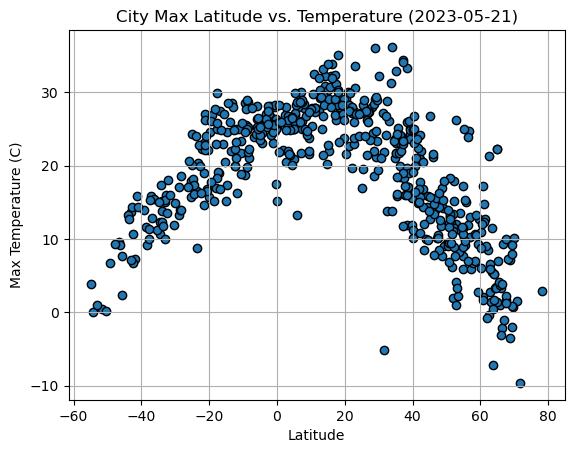

In [62]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-05-21)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

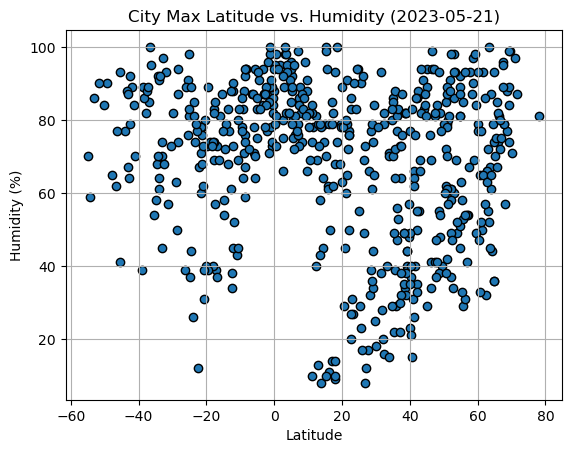

In [63]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-05-21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

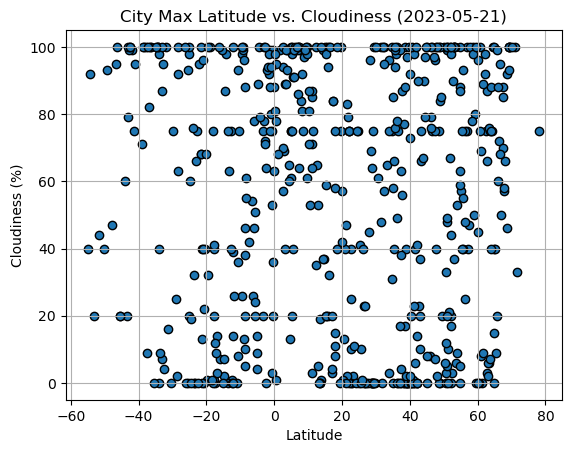

In [64]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2023-05-21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

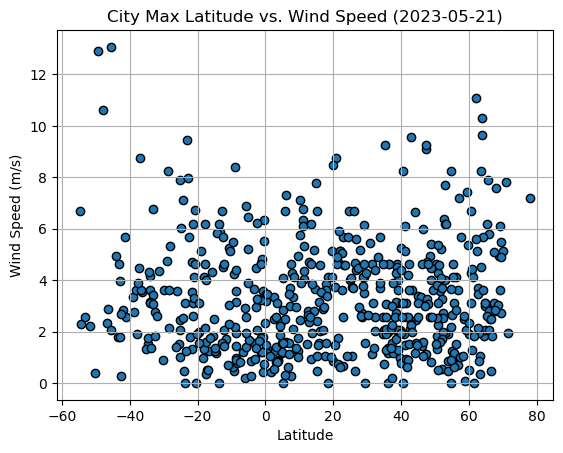

In [65]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-05-21)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"]<= 0].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hassi messaoud,31.6804,6.0729,21.92,28,0,3.09,DZ,1684711319
3,san patricio,28.0170,-97.5169,27.97,66,45,5.18,US,1684711320
5,chinampa de gorostiza,21.3667,-97.7333,27.69,65,83,4.70,MX,1684711320
6,bethel,41.3712,-73.4140,20.47,66,0,3.09,US,1684711320
7,iskateley,67.6803,53.1512,9.90,79,57,2.81,RU,1684711321


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"]>= 0].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,antofagasta,-23.6500,-70.4000,16.60,85,32,3.10,CL,1684711142
2,port-aux-francais,-49.3500,70.2167,6.70,90,93,12.91,TF,1684711255
4,fale old settlement,-9.3852,-171.2468,28.55,78,98,4.25,TK,1684711320
11,young,-32.6833,-57.6333,16.05,97,95,2.75,UY,1684711322
12,hithadhoo,-0.6000,73.0833,28.05,73,3,0.42,MV,1684711322


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6296287193358243


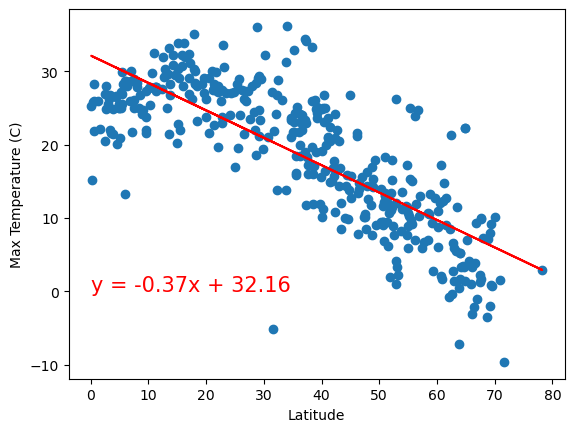

In [75]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (0,0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.7446253293101524


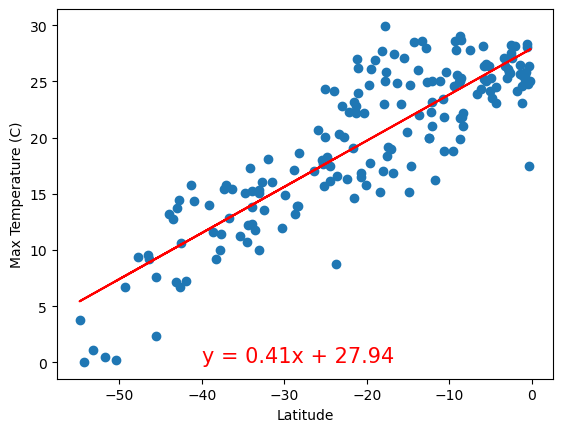

In [79]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-40,0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
There is a very clear relationship between latitude and max temperature of a city; this makes sense because the further one travels from the equator (increasingly positive and negative latitudes, or north and south), the colder it will be. Both scatter plots show very strong correlation values to support this as well. There are some anomalies which might be due to cities that lie further inland as opposed to next to the ocean, or altitude, to name a few other factors the raw data does not provide.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0043907779136795


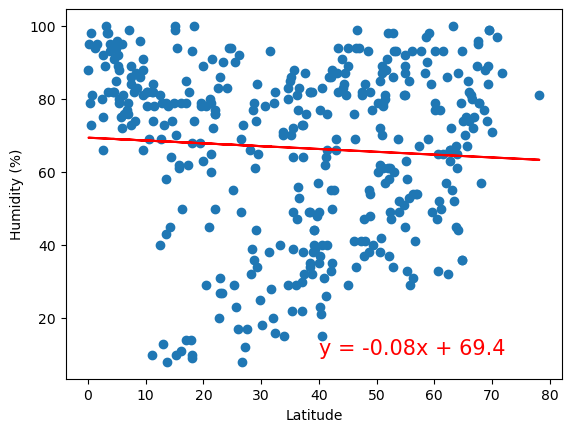

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.009655129453843114


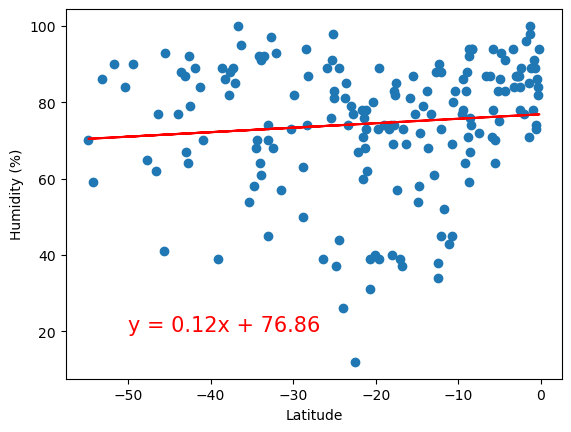

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
The r-values for these linear regression plots are extremely close to zero, which suggests almost non-existent correlation between the two variables. One might believe that the closer one gets to the equator, the more humidity a city might experience, but according to these charts, it is not the case. It might be due to other weather factors, such as how much rain a city receives over the year, or how far above or below sea-level it lies.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0026719960444544413


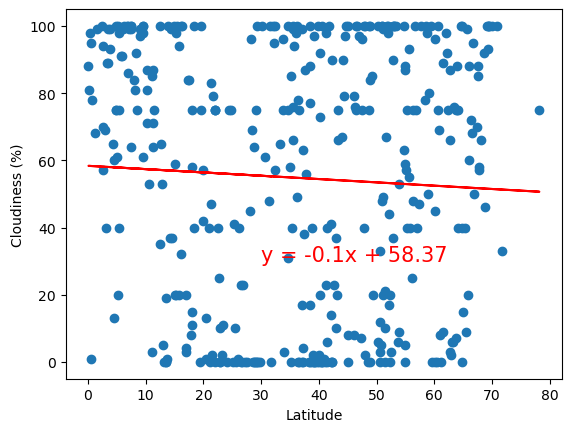

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (30,30), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.00967361551651253


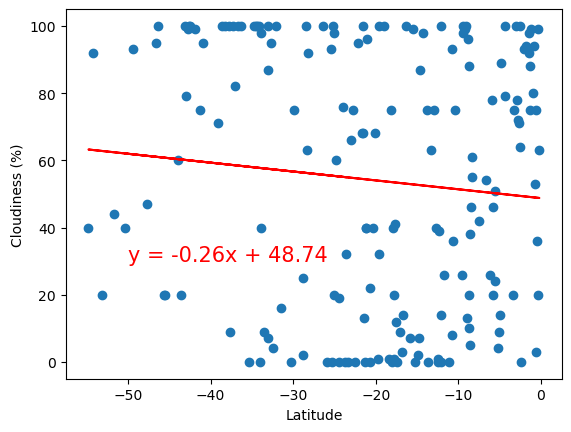

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
Again, there seems to be no real correlation between the cloudiness of a city and how far north or south it is. R-values for both the northern and southern hemispheres suggest that other factors contribute to how cloudy a city gets; perhaps some such as how close a city lies near a desert, mountains, or the ocean.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017724451597143333


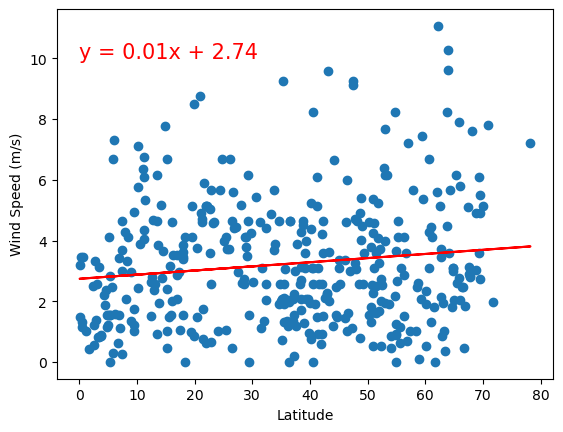

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (0,10), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.03675838163095302


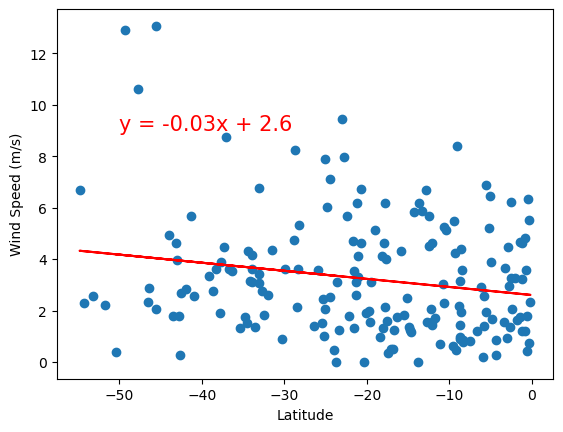

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o")
plt.plot(x_values, regress_values, "r-")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-50,9), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
The linear relationships here also provide the hypothesis that there is no correlation between latitude and wind speed. Though the r-values are little better than those for cloudiness and humidity, it is most likely safe to assume that latitude alone does not determine the wind speed a city experiences. We might consider other variables, such as the natural geography of a city's location, whether a city experiences frequent natural occurences (such as tornadoes), and how close a city lies to valleys, mountains, or the ocean.